# Linear separability study

In [1]:
import operator
from utils import *
from models import *

import torch.optim as optim

%matplotlib inline
import seaborn as sns
sns.set()  # Applies seaborn style defaults to matplotlib

## `AND` with a single neuron.

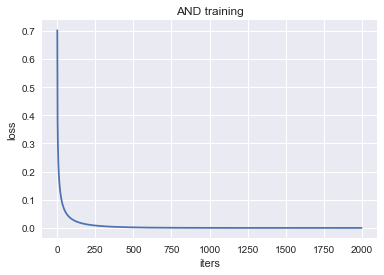

In [2]:
inputs, outputs = create_xor_data(operator.and_)

num_input_bits = 2
num_output_bits = 1
model = nn.Sequential(
        nn.Linear(num_input_bits, num_output_bits),
        nn.Sigmoid()
    )


losses = train(
        model, 
        torch.Tensor(inputs), 
        torch.Tensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.1),
        num_iters=2000,
    )

create_loss_plot(losses, title='AND training')

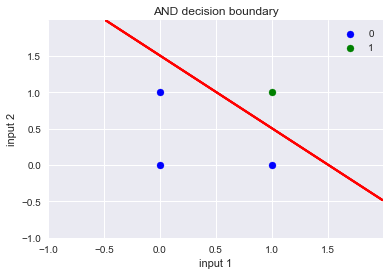

In [3]:
create_decision_boundary_plot(model, inputs, outputs, title='AND decision boundary')

## `XOR` with a single neuron.

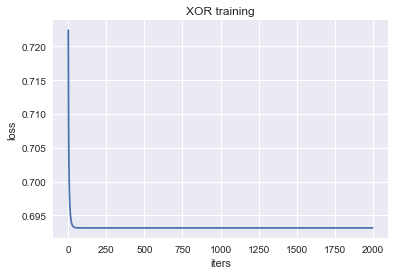

In [4]:
inputs, outputs = create_xor_data(operator.xor)

model = nn.Sequential(
            nn.Linear(num_input_bits, num_output_bits),
            nn.Sigmoid()
        )

losses = train(
        model, 
        torch.Tensor(inputs), 
        torch.Tensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.01),
        num_iters=2000,
    )

create_loss_plot(losses, title='XOR training')

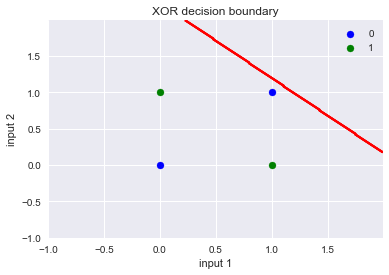

In [5]:
create_decision_boundary_plot(model, inputs, outputs, title='XOR decision boundary')

The perceptron is unable to approximate the `XOR` gate! This is due to the fact that the `XOR` problem is not 
[linearly seperable][1] i.e. there is no **single** line which can seperate the two classes. To address this problem, we simply need to add an additional perceptron which, in turn, introduces an **additional decision boundary**.

[1]: https://en.wikipedia.org/wiki/Linear_separability

## `XOR` with two neurons.

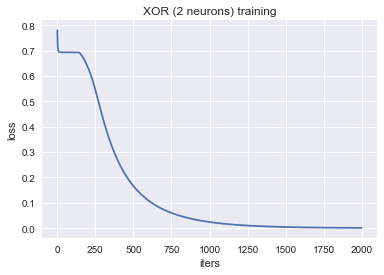

In [6]:
inputs, outputs = create_xor_data(operator.xor)

num_hidden_units = 2
model = nn.Sequential(
            nn.Linear(num_input_bits, num_hidden_units),
            nn.Sigmoid(),
            nn.Linear(num_hidden_units, num_output_bits),
            nn.Sigmoid()
        )

losses = train(
        model, 
        torch.Tensor(inputs), 
        torch.Tensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.01),
        num_iters=2000,
    )

create_loss_plot(losses, title='XOR (2 neurons) training')

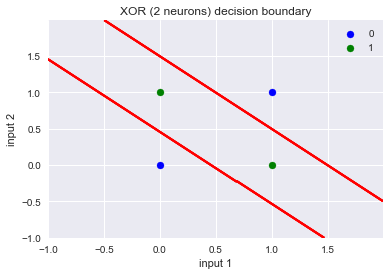

In [7]:
create_decision_boundary_plot(model, inputs, outputs, title='XOR (2 neurons) decision boundary')

## XOR with RNN.

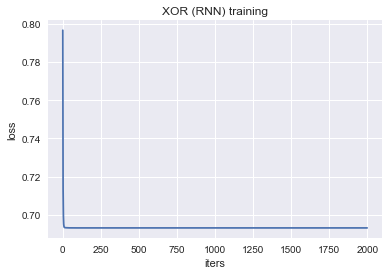

In [8]:
inputs, outputs = create_xor_data(operator.xor)

model = RNN()
losses = train(
        model, 
        torch.FloatTensor(inputs).unsqueeze(-1), 
        torch.FloatTensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.01),
        num_iters=2000
    )

create_loss_plot(losses, title='XOR (RNN) training')

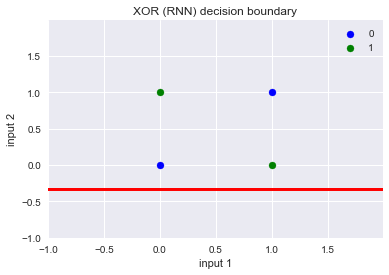

In [9]:
create_decision_boundary_plot(model, inputs, outputs, title='XOR (RNN) decision boundary')

## XOR with LSTM.

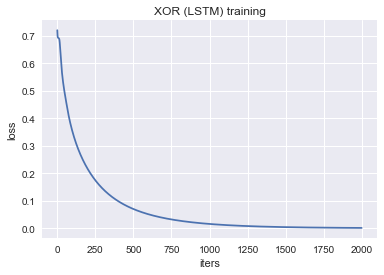

In [10]:
inputs, outputs = create_xor_data(operator.xor)

model = LSTM()
losses = train(
        model, 
        torch.FloatTensor(inputs).unsqueeze(-1), 
        torch.FloatTensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.01),
        num_iters=2000
    )

create_loss_plot(losses, title='XOR (LSTM) training')

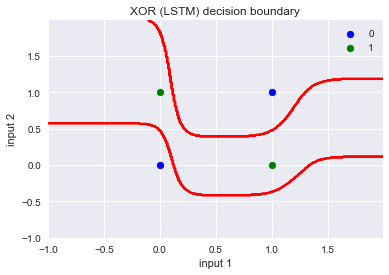

In [11]:
create_decision_boundary_plot(model, inputs, outputs, title='XOR (LSTM) decision boundary')

## XOR with GRU.

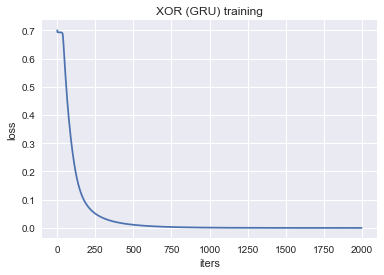

In [12]:
inputs, outputs = create_xor_data(operator.xor)

model = GRU()
losses = train(
        model, 
        torch.FloatTensor(inputs).unsqueeze(-1), 
        torch.FloatTensor(outputs).unsqueeze(-1),
        optim.RMSprop(model.parameters(), lr=0.01),
        num_iters=2000
    )

create_loss_plot(losses, title='XOR (GRU) training')

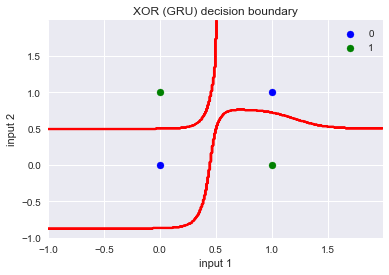

In [13]:
create_decision_boundary_plot(model, inputs, outputs, title='XOR (GRU) decision boundary')

For more information, as well as visualizations, see:
  * [Quora: What is XOR problem in neural networks?][1]
  * [XOR problem theory][2]


[1]: https://www.quora.com/What-is-XOR-problem-in-neural-networks
[2]: http://home.agh.edu.pl/~vlsi/AI/xor_t/en/main.htm